**Helpful resources**

Sklearn train_test_split - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
Implementing a CNN in TensorFlow & Keras - https://learnopencv.com/implementing-cnn-tensorflow-keras/

**SET UP STEPS - Windows**
# Recommeded create virtual environment
Go to Jupyter Notebook kernels (top right)
Select another kernel
Python Environments
+ Create Python Environment
Venv
Select Python interpreter and create

# Prepare venv using terminal
activate environment: .\.venv\Scripts\activate

# Installations on venv
pip install jupyter ipykernel
pip install matplotlib 
pip install pandas
pip install scikit-learn
pip install tensorflow



In [35]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
print(tf.__version__)

2.16.2


In [36]:
def load_process_images(image_path):
    image_path += ".jpg"
    img = load_img(image_path)
    img_array = img_to_array(img)

    img_array = img_array / 255.0
    return img_array


def get_all_data(all_images, labels, path):
    images = []
    all_labels = []

    for img, label in zip(all_images, labels):
        img_path = os.path.join(path, img).replace("\\", "/")
        img_pixels = load_process_images(img_path)

        images.append(img_pixels)
        all_labels.append(label)
    
    return np.array(images), np.array(all_labels)

def augment_data():
    # who would have thought: https://keras.io/api/layers/preprocessing_layers/image_augmentation/
    return tf.keras.Sequential([
        layers.RandomRotation(0.2),
        layers.RandomFlip("horizontal"),
        layers.RandomFlip("vertical"),
        layers.RandomZoom(0.2),
        layers.RandomBrightness(0.2),
        layers.RandomContrast(0.2),
    ])

# old model 81%
def build_model():

    # random bs
    model = models.Sequential([
        
       layers.Conv2D(32, (3, 3), activation='relu',
               padding='same', input_shape=(224, 224, 3)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        
        # sigmoid here
        layers.Dense(1, activation='sigmoid')
    ])
    
    return model

def oversample_model():
    model = models.Sequential([
        
        augment_data(),
        
        layers.Conv2D(32, (3, 3), activation='relu',
               padding='same', input_shape=(224, 224, 1)),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        
        # sigmoid here
        layers.Dense(1, activation='sigmoid')
    ])
    
    return model


In [37]:
# File paths
labels_path = "../preprocessed_images/ISIC_2019_Training_GroundTruth_preprocessed.csv"
images_path = "../preprocessed_images"

In [38]:
''' 
Create 80 - 20 train test (validation set) split

stratify - Ensures class distribution is similar in both sets based on the labels

'''
df = pd.read_csv(labels_path)
image_names = df['image'].values # X - images
image_labels = df['MEL'].values # y - labels

X_train_names, X_test_names, y_train, y_test = train_test_split(image_names, image_labels, 
                                                    test_size=0.2, random_state=88, stratify=image_labels)

# print("Train set size: ", len(X_train))
# print("Test set size: ", len(X_test))

X_train, y_train = get_all_data(X_train_names, y_train, images_path)

X_testing, y_testing = get_all_data(X_test_names, y_test, images_path)

model = build_model()


C:\Users\anony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Starting training...
Epoch 1/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 513s 2s/step - accuracy: 0.6274 - auc_6: 0.6637 - loss: 0.8561 - precision_6: 0.6294 - recall_6: 0.6189 - val_accuracy: 0.5091 - val_auc_6: 0.6423 - val_loss: 1.6060 - val_precision_6: 0.7857 - val_recall_6: 0.0243 - learning_rate: 0.0010
Epoch 2/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 531s 2s/step - accuracy: 0.6615 - auc_6: 0.7122 - loss: 0.6631 - precision_6: 0.6635 - recall_6: 0.6769 - val_accuracy: 0.5130 - val_auc_6: 0.6695 - val_loss: 0.9039 - val_precision_6: 0.9600 - val_recall_6: 0.0265 - learning_rate: 0.0010
Epoch 3/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 547s 2s/step - accuracy: 0.6777 - auc_6: 0.7387 - loss: 0.6176 - precision_6: 0.6897 - recall_6: 0.6635 - val_accuracy: 0.6606 - val_auc_6: 0.7542 - val_loss: 0.6114 - val_precision_6: 0.6202 - val_recall_6: 0.8274 - learning_rate: 0.0010
Epoch 4/50
227/227 ━━━━━━━━━━━━━━━━━━━━ 542s 2s/step - accuracy: 0.6893 - auc_6: 0.7677 - loss: 0.5779 - precision_6: 0.6945 - recall_6: 0.691

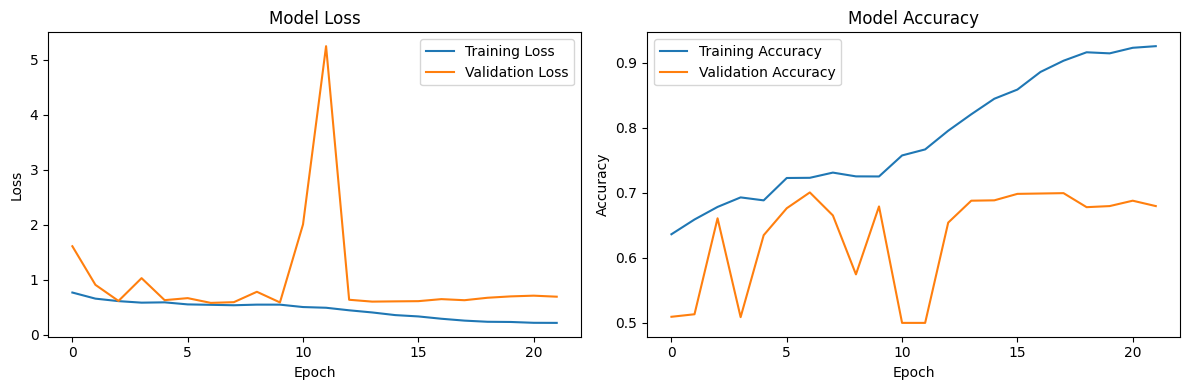

In [39]:
#CONSTANTS

BATCH_SIZE = 32
EPOCHS = 50


model = build_model()


total = len(y_train)
pos_weight = (total / (2 * np.sum(y_train)))
neg_weight = (total / (2 * (total - np.sum(y_train))))
class_imbal = {0: neg_weight, 1: pos_weight}

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 
                tf.keras.metrics.AUC(),
                tf.keras.metrics.Precision(),
                tf.keras.metrics.Recall()]
)

# Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=1e-6
)

# Train the model
print("Starting training...")
modeling = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_testing, y_testing),
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_imbal,
)

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(modeling.history['loss'], label='Training Loss')
plt.plot(modeling.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(modeling.history['accuracy'], label='Training Accuracy')
plt.plot(modeling.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()